In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
titanic = pd.read_csv("titanic.csv")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='class'>

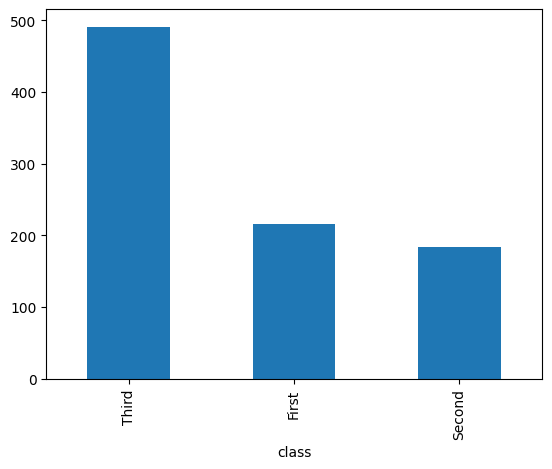

In [14]:
titanic.value_counts("class").plot(kind="bar")

<Axes: xlabel='class'>

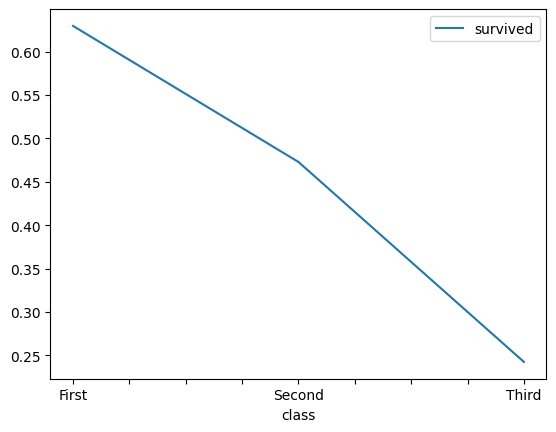

In [16]:
pdf = (
    titanic.groupby("class")
    .agg(survived=("survived", "mean"))
    .reset_index()
)
pdf.plot(kind="line", x="class", y="survived")

In [29]:
titanic['class'].value_counts()


class
Third     491
First     216
Second    184
Name: count, dtype: int64

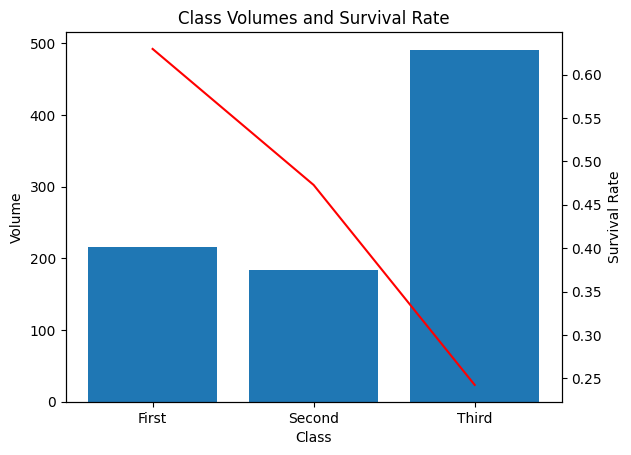

In [31]:

# Bar chart of class volumes
vol_df = titanic['class'].value_counts()
index_order = ['First', 'Second', 'Third']
vol_df = vol_df.reindex(index_order)
fig, ax1 = plt.subplots()
ax1.bar(vol_df.index, vol_df.values)
ax1.set_xlabel('Class')
ax1.set_ylabel('Volume')

# Line chart of survival rate
prob_df = (
    titanic.groupby("class")
    .agg(survived=("survived", "mean"))
)
prob_df = prob_df.loc[vol_df.index]
ax2 = ax1.twinx()
ax2.plot(prob_df.index, prob_df.survived, color='red')
ax2.set_ylabel('Survival Rate')

# Set labels and title
plt.title('Class Volumes and Survival Rate')
plt.show()